# Cloud Classification in 19th Century Paintings
### Date: 2022 
### Sage Ren
### Digital Humanities 125

## Summary
### Dataset Needed:
- Different categories of cloud images (Ac, As, Cb, Cc, Ci, Cs, Ct, Cu, Ns, Sc, St)
- https://www.kaggle.com/competitions/cloud-classification/data
### Methods
- Use Albumentation and Oil Painting Filter and cloud images to prepare dataset
- Use fastai framework to classify clouds

## 1. Image Pre-processing using Open-CV and Albumentation

### 1.1 Oil Painting Effects with OpenCV

In [1]:
# importing prerequisites
from fastai.vision.all import *
from fastai.vision import *

/Users/ren/Library/Python/3.8/lib/python/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/ren/Library/Python/3.8/lib/python/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/ren/Library/Python/3.8/lib/python/site-packages/torchvision/image.so
  Reason: tried: '/usr/local/lib/libpng16.16.dylib' (no such file), '/usr/lib/libpng16.16.dylib' (no such file)
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data = "data/train/"
output = "clouds/"

In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

#### Parameters Tuning

In [30]:
# Having various degrees of oil painting effects help to offset errors
img = cv2.imread(data+"Ac/Ac-N001.jpg")
res = cv2.xphoto.oilPainting(img, 3, 1)
res1 = cv2.xphoto.oilPainting(img, 5, 1)
res2 = cv2.xphoto.oilPainting(img, 7, 1)

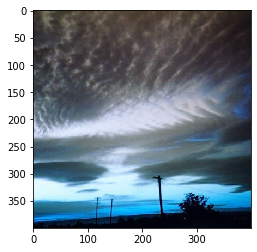

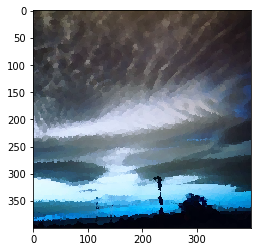

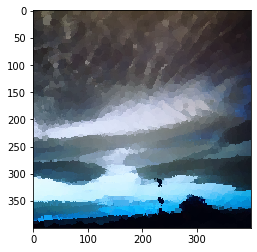

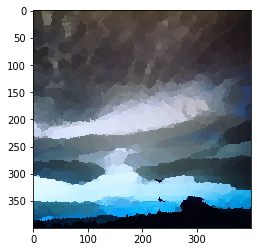

In [31]:
plt.imshow(img, interpolation='nearest')
plt.show()
plt.imshow(res, interpolation='nearest')
plt.show()
plt.imshow(res1, interpolation='nearest')
plt.show()
plt.imshow(res2, interpolation='nearest')
plt.show()

In [32]:
import glob
import os

In [14]:
import albumentations as A

In [15]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [19]:
SIZE=248

In [20]:
i = 0
for file in glob.glob(data+"**/*.jpg"):
    lis = file.split("/")
    foldername = lis[-2]
    if not os.path.exists('clouds/'+foldername):
        os.makedirs('clouds/'+foldername)
    img = cv2.imread(file)
    res = cv2.xphoto.oilPainting(img, 3, 1)
    res1 = cv2.xphoto.oilPainting(img, 7, 1)
    
    img = cv2.resize(img, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", img)
    i += 1
    res = cv2.resize(res, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", res)
    i += 1
    res1 = cv2.resize(res1, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", res1)
    i += 1
    
    transformed = transform (image = img)
    transformed_image1 = transformed['image']
    transformed_image1 = cv2.resize(transformed_image1, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", transformed_image1)
    i += 1
    
    transformed1 = transform (image = res)
    tf1 = transformed1['image']
    tf1 = cv2.resize(tf1, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", tf1)
    i += 1
    
    transformed2 = transform (image = res1)
    tf2 = transformed2['image']
    tf2 = cv2.resize(tf2, (SIZE, SIZE))
    cv2.imwrite("clouds/"+foldername+"/"+ foldername + str(i) + ".png", tf2)
    i += 1
    

In [33]:
import torch
torch.num_workers = 0

In [3]:
dls = ImageDataLoaders.from_folder("clouds/", valid_pct = 0.2,num_workers=0)

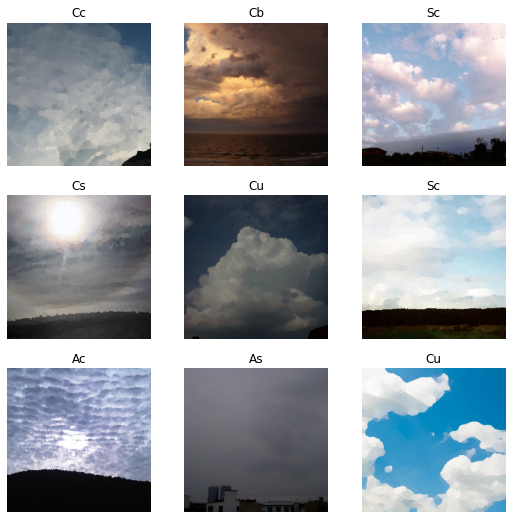

In [4]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

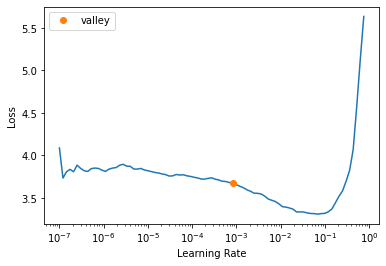

In [25]:
learn.lr_find()

In [37]:
learn.fine_tune(5, 8e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.504881,1.588009,0.515967,21:50


epoch,train_loss,valid_loss,error_rate,time
0,1.723142,1.209520,0.406172,37:58
1,1.144903,0.845279,0.282024,37:52
2,0.649012,0.637110,0.205597,38:00
3,0.335594,0.560860,0.189092,39:19
4,0.228760,0.550338,0.180122,40:09


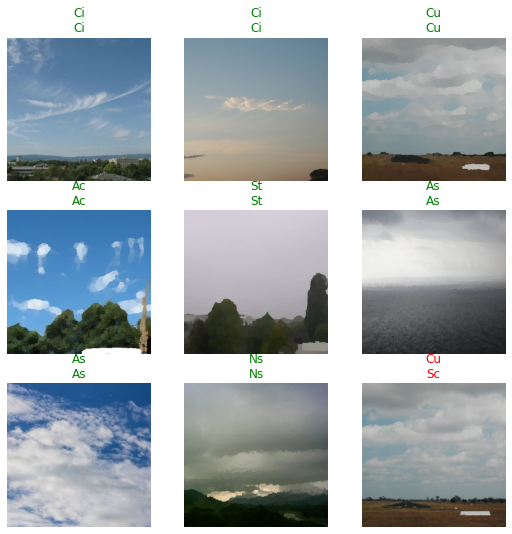

In [38]:
learn.show_results()

In [39]:
interp = Interpretation.from_learner(learn)

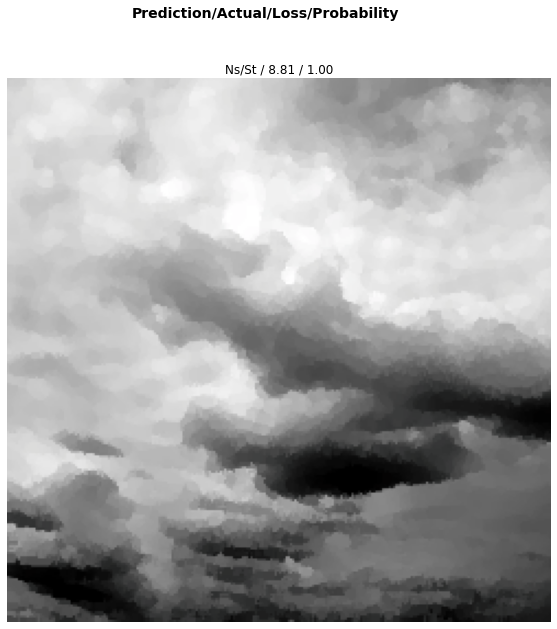

In [40]:
interp.plot_top_losses(1, figsize=(15,10))

In [41]:
from fastai.vision.all import *
from random import randint

In [43]:
from ann_visualizer.visualize import ann_viz

In [44]:
learn.save('Apr16')

Path('clouds/models/Apr16.pth')

In [45]:
learn.export()

In [50]:
img = dls.valid_ds[0][0]
learn.predict(img)

('Ac',
 TensorBase(0),
 TensorBase([9.5192e-01, 1.0527e-02, 7.2009e-05, 1.3799e-02, 7.6997e-05, 1.6415e-04,
         4.7743e-05, 5.8388e-06, 2.2181e-02, 1.0387e-04, 1.1049e-03]))

In [46]:
interpClassification = ClassificationInterpretation.from_learner(learn)

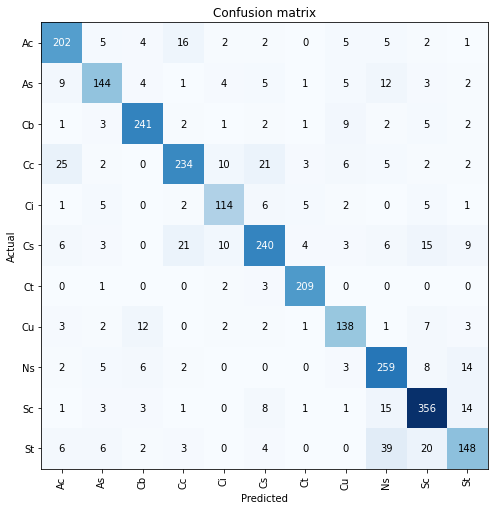

In [47]:
classlist = ['Ac','Ns','Ct']
interpClassification.plot_confusion_matrix(figsize=(7,7))

In [48]:
preds, y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8198779821395874 %.


In [74]:
preds

TensorBase([[9.5192e-01, 1.0527e-02, 7.2009e-05,  ..., 2.2181e-02, 1.0387e-04,
         1.1049e-03],
        [9.4593e-01, 1.5068e-03, 5.3784e-05,  ..., 2.0468e-03, 3.9171e-04,
         7.2777e-04],
        [5.8862e-04, 2.9376e-04, 1.4000e-04,  ..., 9.9772e-01, 6.2459e-05,
         9.8093e-04],
        ...,
        [9.8080e-05, 2.2559e-06, 1.4619e-03,  ..., 4.6086e-05, 8.5551e-04,
         7.1558e-05],
        [4.9912e-07, 9.9408e-06, 9.9916e-01,  ..., 2.9628e-05, 7.3153e-04,
         7.7077e-06],
        [8.6595e-06, 5.3302e-04, 1.1342e-05,  ..., 9.9866e-01, 2.4444e-04,
         3.6737e-04]])

In [75]:
y

TensorCategory([0, 0, 8,  ..., 7, 2, 8])

In [49]:
%matplotlib inline
import sys

from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [50]:
model = RandomForestRegressor(n_jobs=-1)

# fits the model and sets the coefficients based on 
# data
model.fit(preds,y)

# scores the model by generating y_hats
model.score(preds,y)

0.968123819997493

In [51]:
interpClassification.print_classification_report()

              precision    recall  f1-score   support

          Ac       0.79      0.83      0.81       244
          As       0.80      0.76      0.78       190
          Cb       0.89      0.90      0.89       269
          Cc       0.83      0.75      0.79       310
          Ci       0.79      0.81      0.80       141
          Cs       0.82      0.76      0.79       317
          Ct       0.93      0.97      0.95       215
          Cu       0.80      0.81      0.80       171
          Ns       0.75      0.87      0.81       299
          Sc       0.84      0.88      0.86       403
          St       0.76      0.65      0.70       228

    accuracy                           0.82      2787
   macro avg       0.82      0.82      0.82      2787
weighted avg       0.82      0.82      0.82      2787



In [82]:
learn.predict("cloud/Sc/Sc0.png")

('Sc',
 TensorBase(9),
 TensorBase([1.4250e-04, 2.4930e-04, 1.4750e-04, 1.4072e-06, 2.1679e-04, 1.8215e-02,
         1.2222e-05, 6.1663e-05, 2.3383e-04, 9.8062e-01, 9.8405e-05]))

In [83]:
learn.predict("cloud/Ac/Ac1920.png")

('Ac',
 TensorBase(0),
 TensorBase([9.6554e-01, 5.1318e-04, 1.2306e-05, 2.9780e-02, 2.7487e-03, 1.2088e-03,
         3.2225e-05, 6.9734e-05, 4.2090e-05, 1.0485e-05, 4.6774e-05]))

In [7]:
learn1 = learn.load("Apr16")

In [24]:
learn1.predict("images/bierstadt/1_bierstadt_Among the Sierra Nevada, California.jpg")

('Ac',
 TensorBase(0),
 TensorBase([9.5417e-01, 8.9926e-05, 1.0406e-03, 2.9594e-03, 2.2043e-04, 7.0955e-04,
         5.1955e-06, 3.2566e-02, 4.0197e-03, 3.7434e-03, 4.7193e-04]))

In [25]:
learn1.predict("images/bierstadt/344_bierstadt_California Spring (Landscape near Sacramento).jpg")

('Ac',
 TensorBase(0),
 TensorBase([5.1831e-01, 2.0779e-04, 6.3831e-02, 1.0876e-03, 1.0336e-04, 1.8060e-05,
         9.5789e-05, 5.6390e-02, 2.1567e-01, 1.4139e-01, 2.8941e-03]))

In [10]:
learn1.predict("images/durand/5_durand_A Pastoral Scene.jpg")[0]

'Cu'

In [12]:
#climate change
#future artists
artists = []
artworks = []
cloud_pred = []
for file in glob.glob("images/**/**.jpg"):
    try:
        filepath = file.split("/")
        artist = filepath[1]
        artwork = filepath[-1]
        cloud = learn1.predict(file)[0]
        artists.append(artist)
        artworks.append(artwork)
        cloud_pred.append(cloud)
    except Exception:
        continue

dict = {'artist':artists, 'artwork':artworks,'cloud prediction': cloud_pred}

df = pd.DataFrame(dict)
df.to_csv("predictions.csv")